# Industriel Engineering Data Understanding
### **Presented By :       Lian Refaelov , Shifra Fuchs, Osher Moyal , Dolev Levavi**

In [171]:
#תמונה

## Backround:
#### - Industrial engineers use scientific tools to solve problems in the organization
#### - The information analyzed will allow you to understand more details about industrial engineers- from the preferred specializations to the effect of the years of experience and the type of facility on the salary of industriel engineers.

## Data Understanding:
#### The data file we analyzed is a survey conducted between industrial engineering students and industrial engineering graduates.
#### The data presents information about the lives of students and graduates of industrial engineering around their profession- (facility, Specialization, Experience, Salary etc.)


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

font1 = {'family':'serif','color':'darkblue','size':25}
font2 = {'family':'serif','color':'darkblue','size':15}

url = "IndustrielEngineeringData.csv"
industriel_data_df = pd.read_csv(url)
#industriel_data_df.head()

## Data Preperation:
### Our data is in hebrew and in order to make it easier to work with we transferred column headings of the data to english:

In [174]:
industriel_data_df.columns = ['Date', 'Status', 'Facility', 'Classification', 'Specialization', 'Company', 'Experience', 'Salary', 'Salary_kind', 'Remarks', 'Car']
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


### Then we started to change types, fix missing values and fixing improper answers :

In [175]:
industriel_data_df['Date'] = pd.to_datetime(industriel_data_df['Date'])
industriel_data_df['Year'] = pd.DatetimeIndex(industriel_data_df['Date']).year
industriel_data_df.head()

,Date,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Remarks,Car,Year
0,2019-08-01 11:41:00,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN,2019
1,2019-08-01 11:49:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא,2019
2,2019-08-01 12:03:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא,2019
3,2019-08-01 12:05:00,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא,2019
4,2019-08-01 12:09:00,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא,2019


In [176]:
industriel_data_df.dtypes

Date              datetime64[ns]
Status                    object
Facility                  object
Classification            object
Specialization            object
Company                   object
Experience                object
Salary                   float64
Salary_kind               object
Remarks                   object
Car                       object
Year                       int64
dtype: object

In [177]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Remarks           278
Company           238
Car                19
Classification      1
Year                0
Salary_kind         0
Salary              0
Experience          0
Specialization      0
Facility            0
Status              0
Date                0
dtype: int64

In [178]:
irrelevant_columns=['Remarks','Date']
industriel_data_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
industriel_data_df["Company"].fillna("לא הוזן",inplace=True)
industriel_data_df["Car"].fillna("לא הוזן",inplace=True)
industriel_data_df["Classification"].fillna("לא הוזן",inplace=True)
industriel_data_df.head()

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019


In [179]:
industriel_data_df.isnull().sum().sort_values(ascending=False)

Year              0
Car               0
Salary_kind       0
Salary            0
Experience        0
Company           0
Specialization    0
Classification    0
Facility          0
Status            0
dtype: int64

In [180]:
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'לא מהנדס , הנדסאי', 'מוסד ממש טוב', 'מכללת אורט בראודה',
       'מכללת אפקה', 'מכללת סמי שמעון', 'מכללת ספיר', 'מכללת רופין',
       'מכללת שנקר'], dtype=object)

In [181]:
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "מוסד ממש טוב"].index, inplace=True)
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "לא מהנדס , הנדסאי"].index, inplace=True)
industriel_data_df.loc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, "Facility"] = "אוניברסיטת בן גוריון"
pd.unique(industriel_data_df.Facility)

array(['אוניברסיטה פתוחה', 'אוניברסיטת אריאל', 'אוניברסיטת בר אילן',
       'אוניברסיטת חיפה', 'אוניברסיטת תל אביב', 'אוניברסיטת בן גוריון',
       'האקדמית עמק יזרעאל', 'האקדמית תל אביב יפו',
       'המכללה להנדסה ירושלים', 'המכללה למינהל', 'המרכז האקדמי לב',
       'טכניון', 'מכללת אורט בראודה', 'מכללת אפקה', 'מכללת סמי שמעון',
       'מכללת ספיר', 'מכללת רופין', 'מכללת שנקר'], dtype=object)

### After fixing the data we started adding collumns based on the old ones that reflects the data in a more accurate way:
#### We divided the facility data to 2 groups based on their type: college / university

In [183]:
my_type = []
for facility in industriel_data_df.Facility:
    if "אוניברסיטה" in facility or "אוניברסיטת" in facility:
        my_type.append("אוניברסיטה")
    elif "טכניון" in facility:
        my_type.append("אוניברסיטה")
    else:
        my_type.append("מכללה")
industriel_data_df['type'] = my_type
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה
...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה


#### We divided the specialization data to 6 groups that connects to the same spacialization: project management, data analysis, product managment, organization and methods, quality assurance, other

In [184]:
pd.unique(industriel_data_df.Specialization)

array(['ניתוח נתונים', 'QA', 'רכז פרוייקטים', 'ניהול פרוייקטים PMO',
       'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'הנדסת ארגון ושיטות', 'ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'ניהול פרוייקטים,  PMO, ניתוח, עיצוב, איפיון והטמעה של מערכות מידע',
       'מיישם מערכות מידע', 'פלנר', 'אינטגרטור', 'תפעול וייצור',
       'תכנון ובקרה', 'רכש', 'ערכית תוכן , רשתות חברתיות',
       'ניהול פרוייקטים, PMO', 'ניהול פרוייקטים,  PMO',
       'ניתוח נתונים , ניתוח, עיצוב, איפיון והטמעה של מערכות מידע, QA',
       'Devops', 'הנדסת ארגון ושיטות, תפעול וייצור, לוגיסטיקה',
       'פתיחות תיקים ודוחות תפעוליים',
       'ניהול פרוייקטים,  PMO, ניתוח נתונים ',
       'פקיד מזונות, פתיחת תיקים ודוחות תפעוליים', 'הנדסת איכות',
       'הנדסת ארגון ושיטות, ייעוץ לוגיסטי', 'ניתוח נתונים , כלכלן',
       'ניהול מערכות מידע', 'ניתוח נתונים , הנדסת ארגון ושיטות',
       'ניתוח נתונים , מדעי נתונים ', 'ניהול פרוייקטים,  PMO, System',
       'הנדסת ארגון ושיטות, תפעול וייצור',
       '

In [185]:
my_speciality = []
for speciality in industriel_data_df.Specialization:
    if "פרוייקטים" in speciality or "PMO" in speciality or "Product" in speciality:
        my_speciality.append("ניהול פרוייקטים")

    elif "ניתוח" in speciality or "אנאליסט" in speciality or "נתונים" in speciality:
        my_speciality.append("ניתוח נתונים")
        
    elif "רכש" in speciality or "ייצור" in speciality or "הטמעה" in speciality:
        my_speciality.append("ניהול היצור")
        
    elif "QA" in speciality:
        my_speciality.append("אבטחת איכות") 

    elif "ארגון ושיטות" in speciality:
        my_speciality.append("ארגון ושיטות")
        
    else:
        my_speciality.append("אחר")
industriel_data_df['speciality'] = my_speciality
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type,speciality
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה,ניתוח נתונים
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה,אבטחת איכות
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה,ניהול פרוייקטים
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה,ניתוח נתונים
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה,ניהול פרוייקטים
...,...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה,ניתוח נתונים
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה,אחר
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה,ניהול היצור
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה,ניתוח נתונים


## Getting to know the basic information about those who answered the survey:

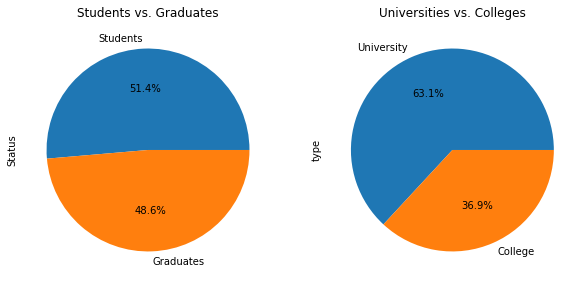

In [186]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Students vs. Graduates")
industriel_data_df['Status'].value_counts().rename(index={'בוגר/ת':'Graduates','סטודנט/ית':'Students'}).plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Universities vs. Colleges")
industriel_data_df['type'].value_counts().rename(index={'אוניברסיטה':'University','מכללה':'College'}).plot.pie(autopct='%1.1f%%')

plt.show()

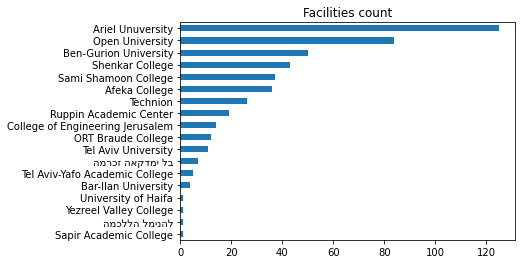

In [187]:
plt.title("Facilities count") 
industriel_data_df["Facility"].value_counts(ascending=True).rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).plot.barh()

## Digging in the data in order to find correlations:

## Specializations Observations:
##### - Specialization preference
##### - Mean Salary For Students Per Speciality

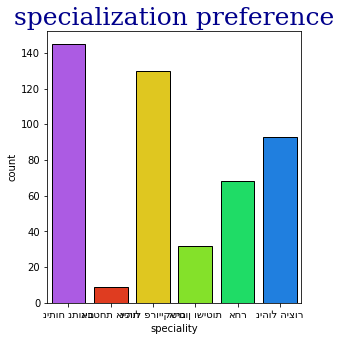

In [189]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("specialization preference" ,fontdict = font1)
#sns.rename(index={'אבטחת איכות':'quality assurance','אחר':'other','ארגון ושיטות':'Organization and Methods','ניהול היצור':'Production Management','ניהול פרוייקטים':'Project management','ניתוח נתונים':'Data Analysis'}).sort_values(ascending=False).plot.bar(figsize=(10,5),color=['lightblue'])
sns.countplot(x="speciality", data=industriel_data_df ,edgecolor = 'black',palette='gist_ncar_r')

plt.show()

Text(0, 0.5, 'Salary')

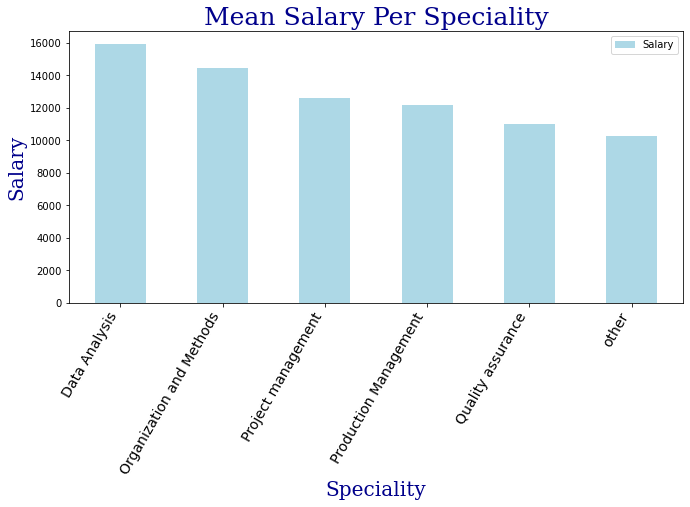

In [190]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

g11=industriel_data_df_filter.groupby("speciality").Salary.mean().rename(index={'אבטחת איכות':'Quality assurance','אחר':'other','ארגון ושיטות':'Organization and Methods','ניהול היצור':'Production Management','ניהול פרוייקטים':'Project management','ניתוח נתונים':'Data Analysis'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary Per Speciality",fontdict = font1)
g11.set_xlabel("Speciality",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

### Observation 1:
#### -The specialty that most people choose is Data Analysis, which is also the most rewarding in terms of salary.

## Salary Observations:
##### - Mean Salary For Students Per College
##### - Mean Salary For Students Per University
##### - Mean Salary For Graduets Per College
##### - Mean Salary For Graduets Per University
##### - The affection of the experience and the facility together on the salary

#### In our salary observations we chose to look at the data filled by 10+ people and we divided the observations between the ones that reflects the students and the ones that reflects the graduates

In [191]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter_graduets = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter_students = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]

Text(0, 0.5, 'Salary')

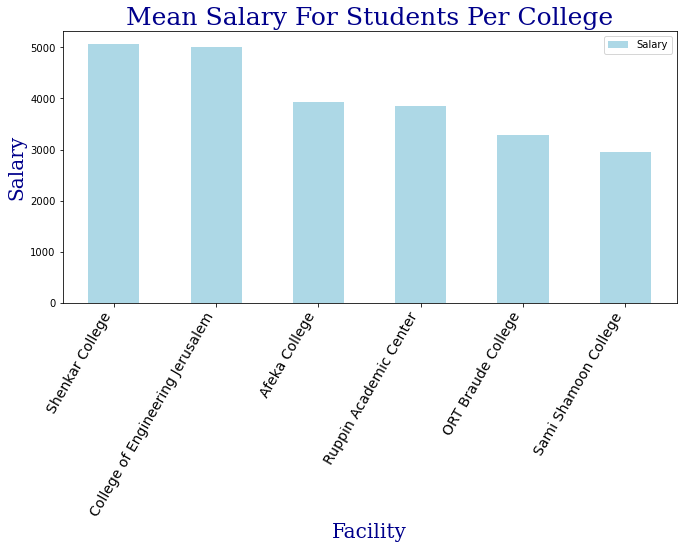

In [192]:
industriel_data_df_filter_students= industriel_data_df_filter_students[industriel_data_df_filter_students.type == "מכללה"]
g11=industriel_data_df_filter_students.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Students Per College",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

Text(0, 0.5, 'Salary')

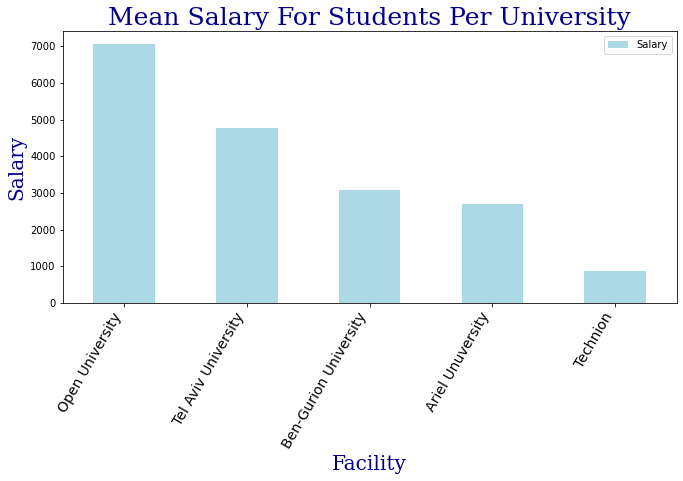

In [193]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Students Per University",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

##### The salary based on our data for college students is 3,000-5,000 NIS and for university students it stands on 1,000-5,000 NIS (while ignoring the Open-University that doesn't reflect the salary that most students receive).

Text(0, 0.5, 'Salary')

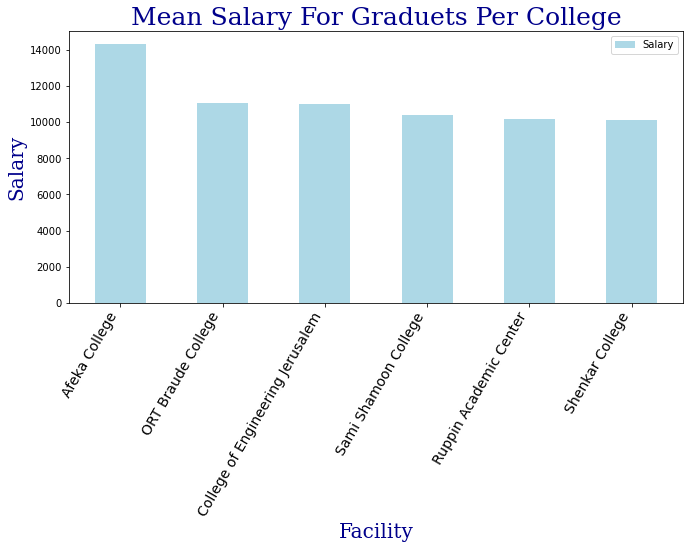

In [194]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Graduets Per College",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

Text(0, 0.5, 'Salary')

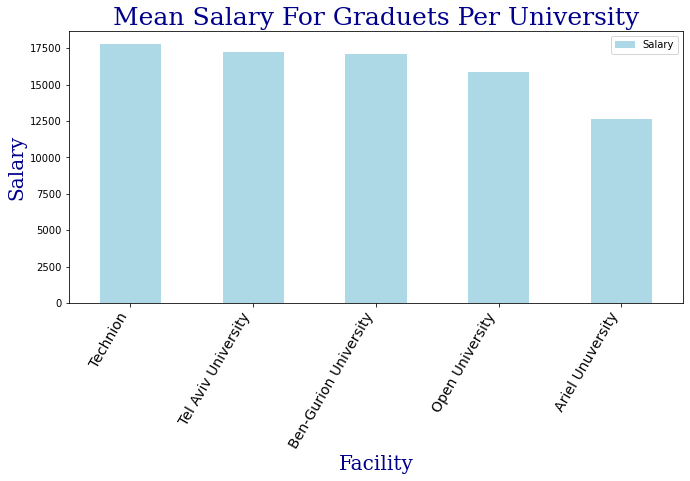

In [195]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Graduets Per University",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

##### The salary based on our data for college graduets is 10,000-14,000 NIS and for university graduets it stands on 12,500-17,500 NIS.

### Observation 2:
#### - College students earn on average more than university students
#### - University graduates earn on average more than college graduates

### Correlations between facility-salary and experience-salary: 

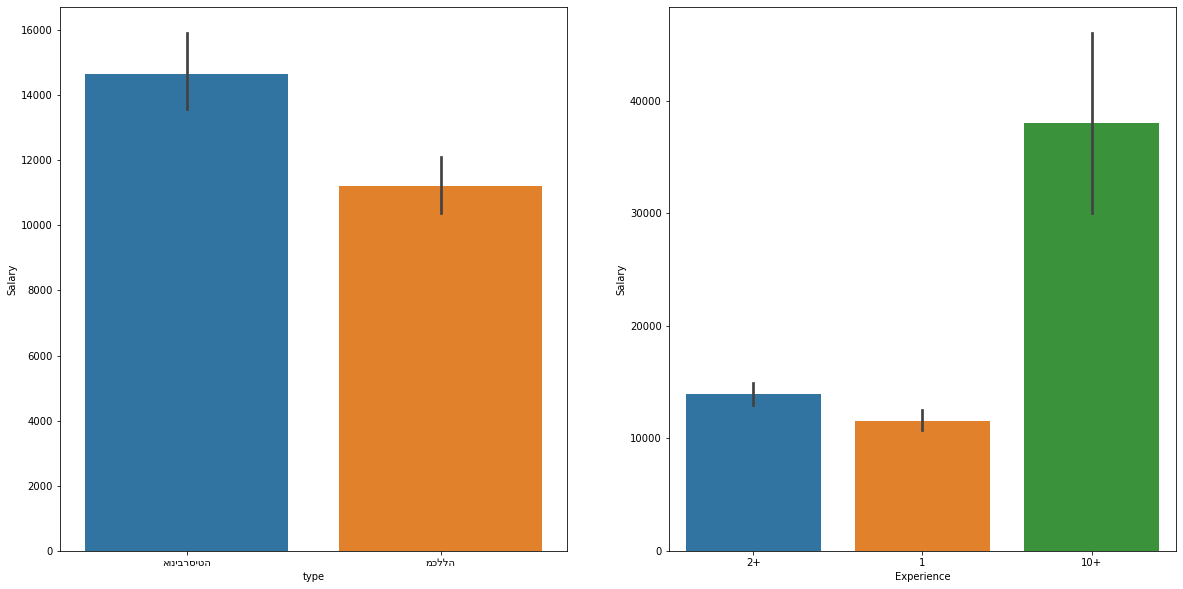

In [143]:
fig, axes=plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(wspace=0.2)
sns.barplot(x="type", y="Salary", data=industriel_data_df_filter_graduets, ax=axes[0])
sns.barplot(x="Experience", y="Salary", data=industriel_data_df_filter_graduets, ax=axes[1])
plt.show()

### Seeing the affection of the experience and the facility together on the salary:

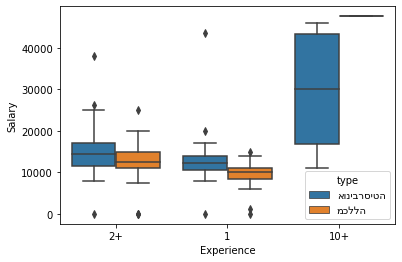

In [196]:
sns.boxplot(x="Experience", y="Salary", hue="type", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])

### Observation:
#### As shown above, the type of facility and the number of experience years both affects the mean salary.
#### But combining the affections we get to see that as the years of experience increase, the effect of the facility type decreases.

## To sum up:
### The data provided us with 3 main observations about the Industrial Engineering field-
#### 1. Data Analysis- the specialty that most people choose which is also the most rewarding in terms of salary.
#### 2. College students earn on average more than university students but university graduates earn on average more than college graduates
#### 3. The more experience an industrial engineer gains- the less impact there is from the type of study facility on his salary